Q1) PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.callbacks import History
history=History()

In [2]:
df1=pd.read_csv('forestfires.csv')
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df1.shape

(517, 31)

In [4]:
df1.size

16027

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df1.duplicated().any()

True

In [9]:
df1.drop_duplicates(inplace=True)
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
df1['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

(array([500.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

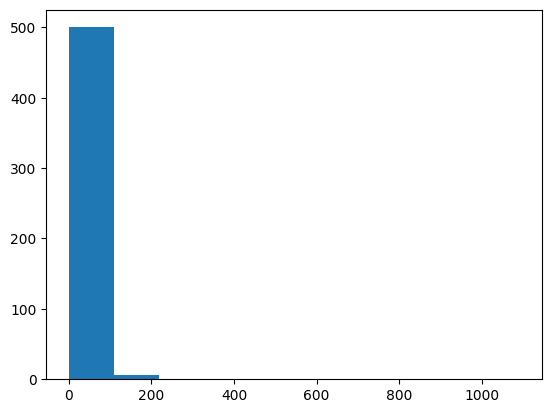

In [11]:
plt.hist(df1['area'])

(array([371.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

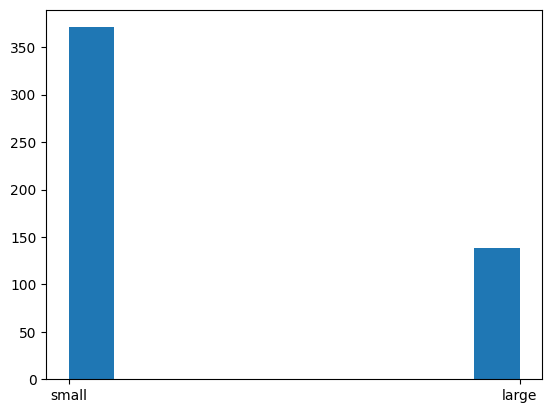

In [12]:
plt.hist(df1['size_category'])

<Axes: >

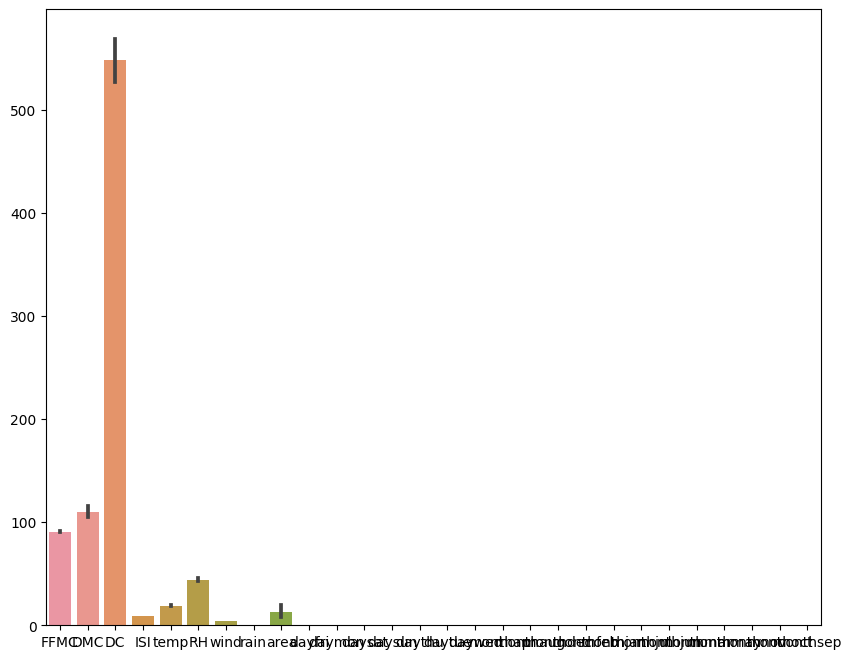

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(data=df1)

<ipython-input-14-976a109f5074>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['area'],shade=True)


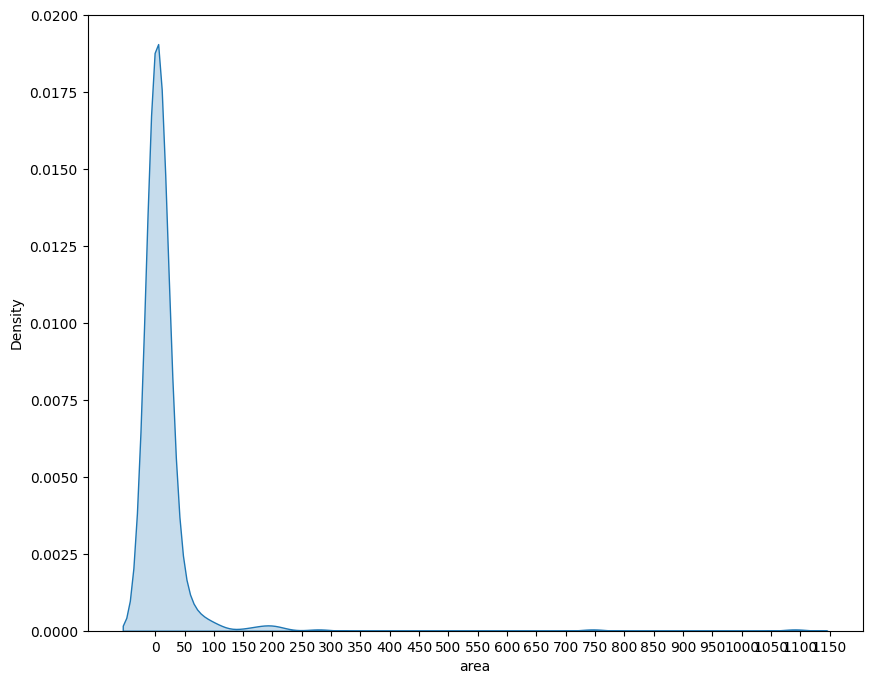

In [14]:
plt.figure(figsize=(10,8))
sns.kdeplot(df1['area'],shade=True)
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [15]:
correlation=df1[df1.columns[0:11]].corr()

<ipython-input-15-59663d7ec37b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df1[df1.columns[0:11]].corr()


<Axes: >

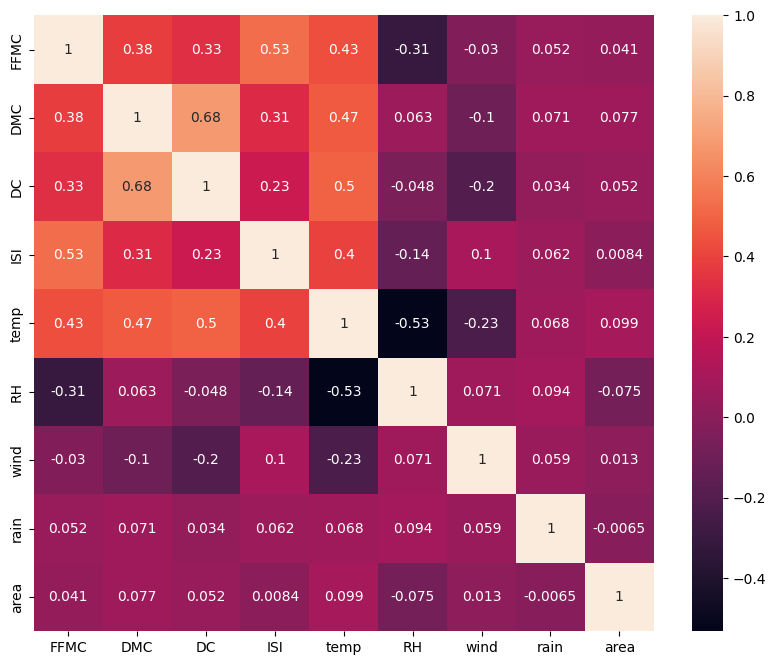

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

# Building the model

In [17]:
mapping={'small':0,'large':1}
df1=df1.replace(mapping)
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df1.drop(['month','day'],axis=1,inplace=True)

In [19]:
#splitting the data
features1=np.array(df1.iloc[:,0:28])
target1=np.array(df1.iloc[:,28])

In [20]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
features1_norm=norm_func(features1)

In [22]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features1_norm,target1,train_size=0.75,random_state=25)

In [23]:
model=Sequential()
model.add(Dense(12,input_dim=28,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(x_train1,y_train1,epochs=120,validation_split=0.33,batch_size=10,callbacks=[history])

Epoch 1/120
26/26 [==============================] - 5s 64ms/step - loss: 0.6808 - accuracy: 0.7176 - val_loss: 0.6727 - val_accuracy: 0.6984
Epoch 2/120
26/26 [==============================] - 0s 10ms/step - loss: 0.6579 - accuracy: 0.7216 - val_loss: 0.6510 - val_accuracy: 0.6984
Epoch 3/120
26/26 [==============================] - 0s 6ms/step - loss: 0.6335 - accuracy: 0.7216 - val_loss: 0.6359 - val_accuracy: 0.6984
Epoch 4/120
26/26 [==============================] - 0s 6ms/step - loss: 0.6144 - accuracy: 0.7216 - val_loss: 0.6262 - val_accuracy: 0.6984
Epoch 5/120
26/26 [==============================] - 0s 9ms/step - loss: 0.6025 - accuracy: 0.7216 - val_loss: 0.6197 - val_accuracy: 0.6984
Epoch 6/120
26/26 [==============================] - 0s 7ms/step - loss: 0.5948 - accuracy: 0.7216 - val_loss: 0.6172 - val_accuracy: 0.6984
Epoch 7/120
26/26 [==============================] - 0s 7ms/step - loss: 0.5911 - accuracy: 0.7216 - val_loss: 0.6164 - val_accuracy: 0.6984
Epoch 8/120

In [26]:
scores=model.evaluate(x_train1,y_train1)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8714
accuracy: 87.14%


In [27]:
model.history.history.keys()

dict_keys([])

In [28]:
hist1=print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:
from tensorflow.keras.utils import plot_model

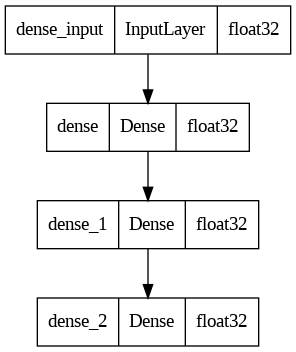

In [30]:
plot_model(model,show_dtype=True,to_file='model.png')

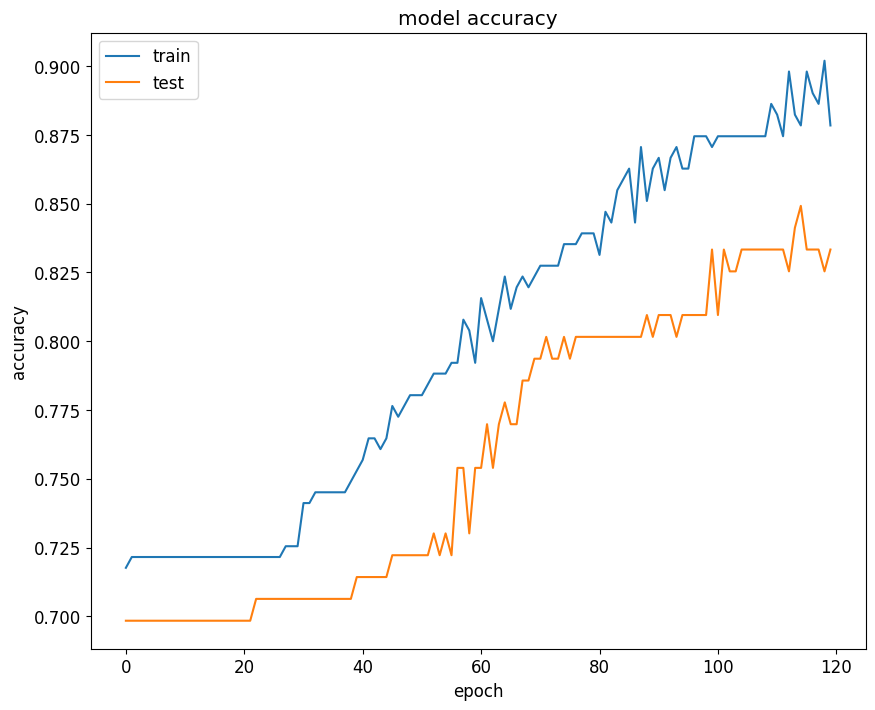

In [31]:
# Plotting
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = 12
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

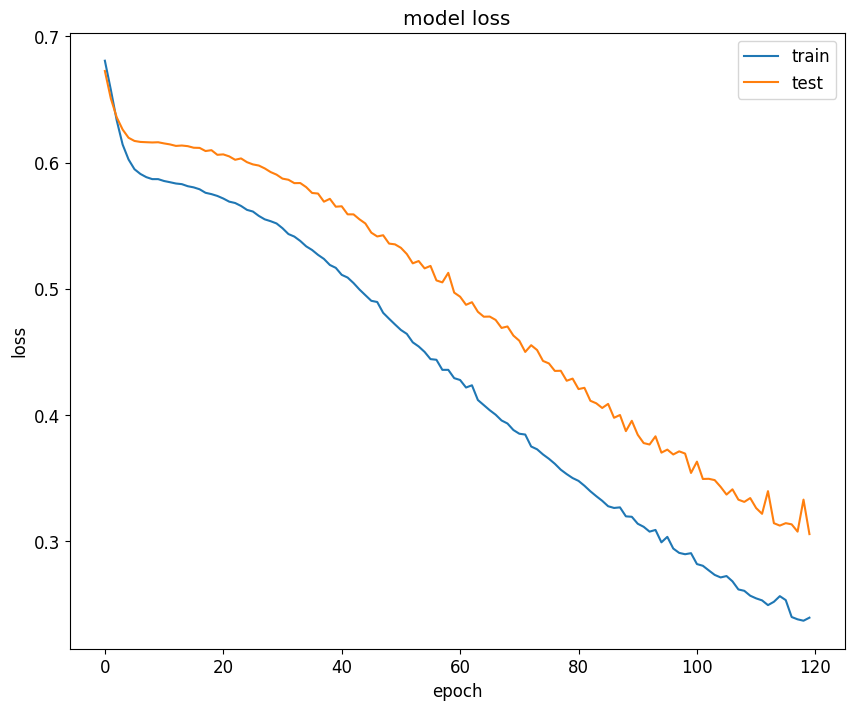

In [32]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [33]:
def ProbForBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

In [34]:
y_predict_test1=model.predict(x_test1)
test_prediction=pd.DataFrame()
test_prediction['test_actual']=y_test1
test_prediction['test_probability']=y_predict_test1
test_prediction['test_predicted']=test_prediction['test_probability'].apply(ProbForBinary)
print(test_prediction.shape)
test_prediction

4/4 [==============================] - 0s 3ms/step
(128, 3)


,test_actual,test_probability,test_predicted
0,0,0.109662,0
1,0,0.094069,0
2,0,0.135126,0
3,0,0.109026,0
4,0,0.110386,0
...,...,...,...
123,0,0.120275,0
124,0,0.141641,0
125,1,0.352328,0
126,0,0.072536,0


In [35]:
y_predict_train1=model.predict(x_train1)
train_prediction=pd.DataFrame()
train_prediction['train_actual']=y_train1
train_prediction['train_probability']=y_predict_train1
train_prediction['train_predicted']=train_prediction['train_probability'].apply(ProbForBinary)
print(train_prediction.shape)
train_prediction

12/12 [==============================] - 0s 2ms/step
(381, 3)


,train_actual,train_probability,train_predicted
0,0,0.085946,0
1,0,0.171307,0
2,0,0.099125,0
3,1,0.994185,1
4,1,0.734146,1
...,...,...,...
376,1,0.249098,0
377,0,0.140217,0
378,0,0.182697,0
379,0,0.101260,0


# Q2) Predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [36]:
df2=pd.read_csv('gas_turbines.csv')
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [37]:
df2.shape

(15039, 11)

In [38]:
df2.size

165429

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [40]:
df2.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [41]:
df2.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [42]:
df2.duplicated().any()

False

In [43]:
df2['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

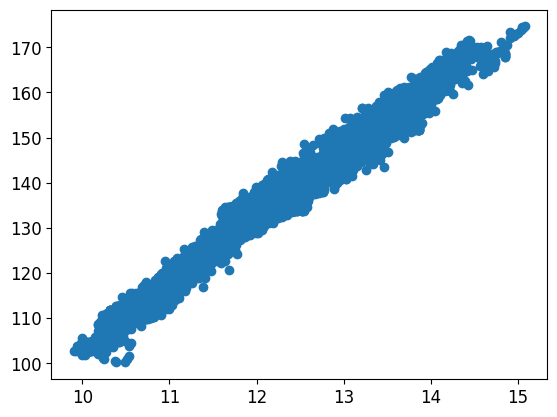

In [44]:
plt.scatter(x="CDP",y="TEY",data=df2)

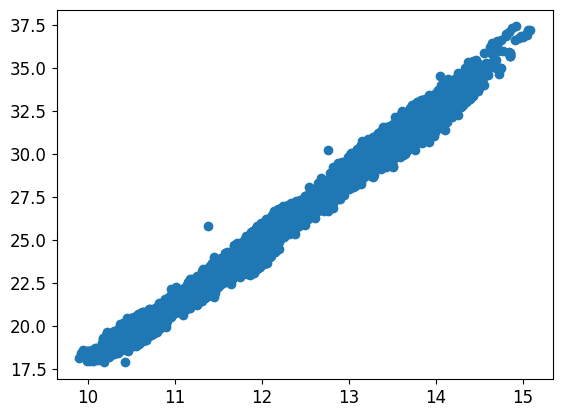

In [45]:
plt.scatter(x="CDP",y="GTEP",data=df2)

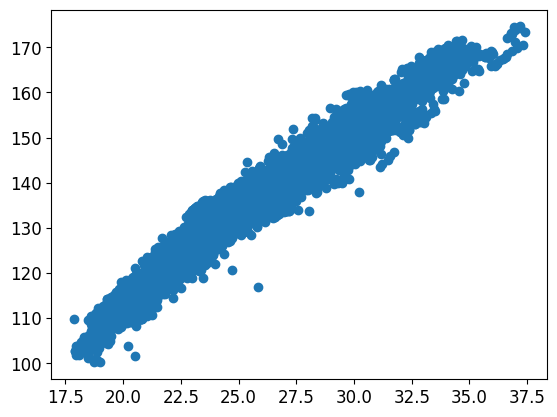

In [46]:
plt.scatter(x="GTEP",y="TEY",data=df2)

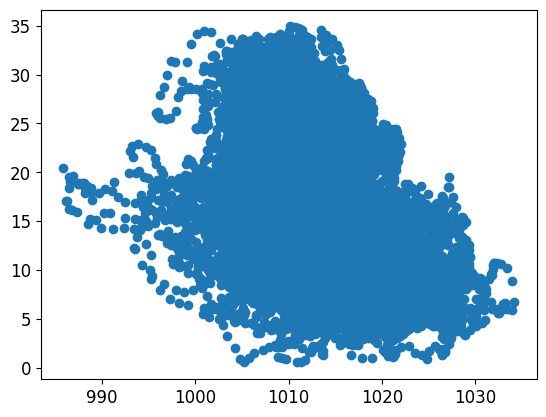

In [47]:
plt.scatter(x="AP",y="AT",data=df2)

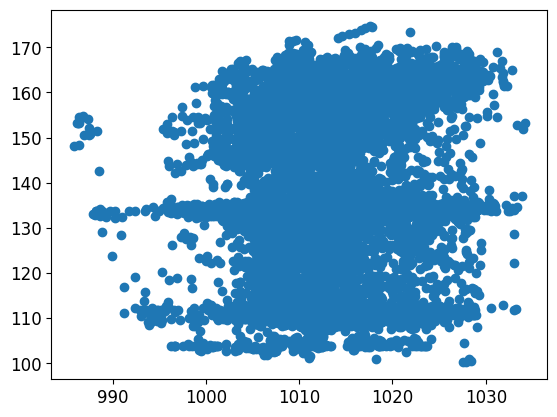

In [48]:
plt.scatter(x="AP",y="TEY",data=df2)

<Axes: >

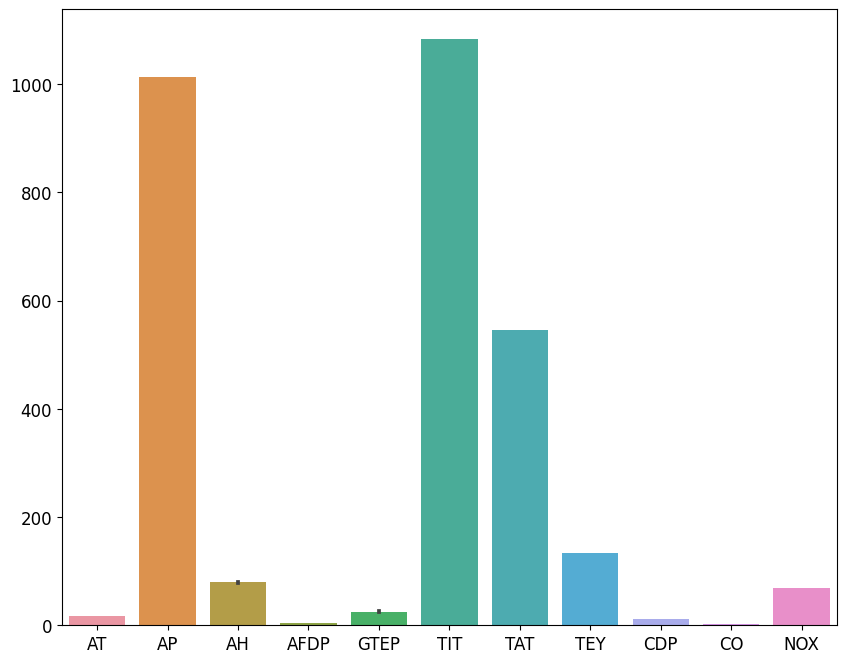

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(data=df2)

<ipython-input-50-e7c524f1d714>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['TEY'],shade=True)


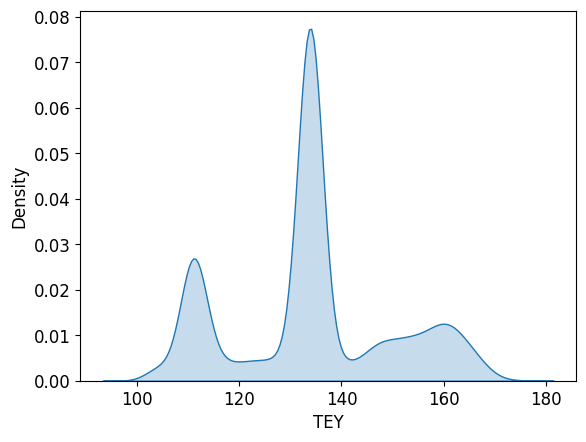

In [50]:
sns.kdeplot(df2['TEY'],shade=True)
plt.show()

In [51]:
correlation=df2.corr()

Text(0.5, 1.0, 'Correlation Map of Variables')

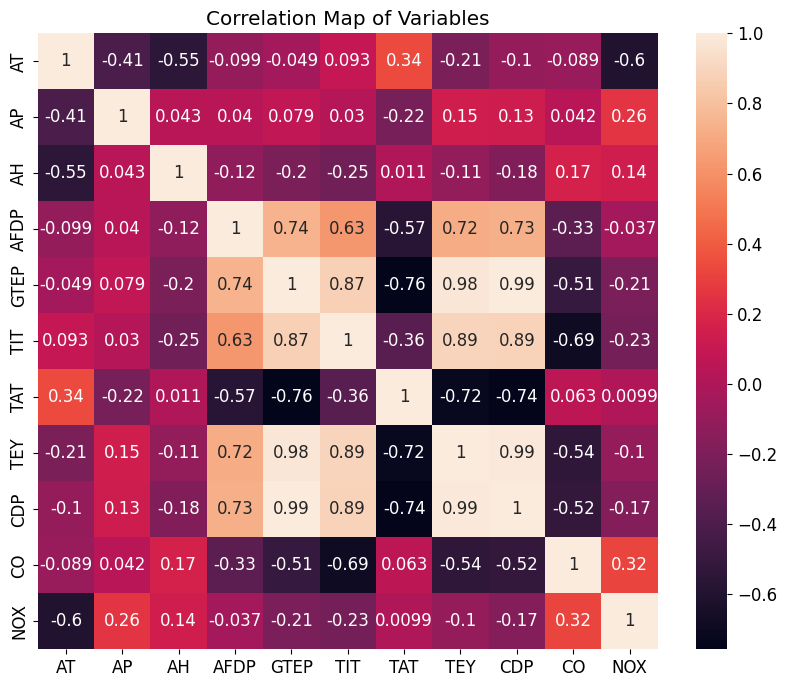

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)
plt.title("Correlation Map of Variables")

# Building the model

In [53]:
features2=df2.loc[:,['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
target2=df2.loc[:,['TEY']]

In [54]:
target2

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [55]:
features2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [56]:
scaler=StandardScaler()

In [57]:
features2=scaler.fit_transform(features2)
target2=scaler.fit_transform(target2)

In [58]:
def baseline_model():
    model=Sequential()
    model.add(Dense(10,input_dim=10,activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [59]:
!pip install keras

In [60]:
!pip install tensorflow

In [61]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [62]:
estimator=RandomForestRegressor(n_estimators=100)
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,features2,target2,cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(),results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Results: 1.00 (0.00) MSE


In [63]:
estimator.fit(features2,target2)
prediction=estimator.predict(features2)
prediction

<ipython-input-63-de83f33ef26d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(features2,target2)


array([-1.23965678, -1.23788158, -1.2319495 , ..., -1.48916416,
       -1.45529004, -1.42094842])

In [64]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=100)

In [65]:
estimator.fit(x_train2,y_train2)
prediction=estimator.predict(x_test2)
prediction

<ipython-input-65-f7d257fd8ff0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(x_train2,y_train2)


array([ 1.48258594,  0.69572324,  0.57579291, ..., -1.94116452,
        1.74357843,  1.0653252 ])

In [66]:
features2=df2.drop('TEY',axis=1)
target2=df2.iloc[:,7]

In [67]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=100)
X_train2=scaler.fit_transform(x_train2)
x_test2=scaler.transform(x_test2)
x_test2

array([[-0.36856146,  0.33104212, -1.64174674, ...,  1.61523109,
        -0.53074776, -1.23406175],
       [-0.36948548, -1.58020698, -0.07037026, ...,  0.64372588,
        -0.3674128 ,  0.50619611],
       [ 1.59906004, -2.54993091, -1.03076064, ...,  0.70994426,
        -0.75197005, -0.7793578 ],
       ...,
       [ 0.24617175,  0.44070395,  1.1546478 , ..., -1.7836765 ,
         3.3969793 ,  0.67386879],
       [-0.90752554,  1.50599034, -1.21227971, ...,  1.83747085,
        -0.34385905, -0.15488884],
       [ 0.87106912,  0.29971017, -0.85011181, ...,  1.20794273,
        -0.32748577, -0.78325717]])

In [68]:
input_size=len(features2.columns)
output_size=1
hidden_layer_size=30

In [69]:
model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size,input_dim=input_size,activation='relu'),tf.keras.layers.Dense(hidden_layer_size, activation='relu'),tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),tf.keras.layers.Dense(output_size)])

In [70]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError'])

In [71]:
n_epochs=100
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(x_train2,y_train2,callbacks=[early_stopping],validation_split=0.1,epochs=n_epochs,verbose=2)

Epoch 1/100
318/318 - 3s - loss: 980.6811 - mean_squared_error: 980.6811 - val_loss: 243.3510 - val_mean_squared_error: 243.3510 - 3s/epoch - 8ms/step
Epoch 2/100
318/318 - 1s - loss: 207.6411 - mean_squared_error: 207.6411 - val_loss: 205.6278 - val_mean_squared_error: 205.6278 - 851ms/epoch - 3ms/step
Epoch 3/100
318/318 - 1s - loss: 161.4126 - mean_squared_error: 161.4126 - val_loss: 122.9600 - val_mean_squared_error: 122.9600 - 631ms/epoch - 2ms/step
Epoch 4/100
318/318 - 1s - loss: 60.9856 - mean_squared_error: 60.9856 - val_loss: 19.4303 - val_mean_squared_error: 19.4303 - 589ms/epoch - 2ms/step
Epoch 5/100
318/318 - 1s - loss: 11.7543 - mean_squared_error: 11.7543 - val_loss: 9.6179 - val_mean_squared_error: 9.6179 - 578ms/epoch - 2ms/step
Epoch 6/100
318/318 - 1s - loss: 7.1579 - mean_squared_error: 7.1579 - val_loss: 5.2848 - val_mean_squared_error: 5.2848 - 568ms/epoch - 2ms/step
Epoch 7/100
318/318 - 1s - loss: 5.3523 - mean_squared_error: 5.3523 - val_loss: 8.1123 - val_mea

In [72]:
test_loss,mean_squared_error=model.evaluate(x_test2,y_test2)

118/118 [==============================] - 0s 2ms/step - loss: 18119.0078 - mean_squared_error: 18119.0078


In [73]:
predictions=model.predict_on_batch(x_test2)

In [74]:
predictions1=pd.DataFrame()
predictions1['Actual']=y_test2
predictions1['Predicted']= predictions
predictions1['% Error']=abs(predictions1['Actual']-predictions1['Predicted'])/predictions1['Actual']*100
predictions1.reset_index(drop=True)

,Actual,Predicted,% Error
0,158.00,1.505096,99.047408
1,144.96,0.959895,99.337821
2,144.25,0.420168,99.708722
3,149.26,0.939408,99.370623
4,110.71,0.149495,99.864967
...,...,...,...
3755,103.62,-0.005853,100.005648
3756,111.52,-0.193309,100.173341
3757,103.68,-0.160119,100.154436
3758,161.72,1.669794,98.967478


In [75]:
model.history.history.keys()

dict_keys([])

In [76]:
hist2=print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [77]:
scores=model.evaluate(x_train2,y_train2)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

353/353 [==============================] - 1s 1ms/step - loss: 2.6220 - mean_squared_error: 2.6220
mean_squared_error: 262.20%


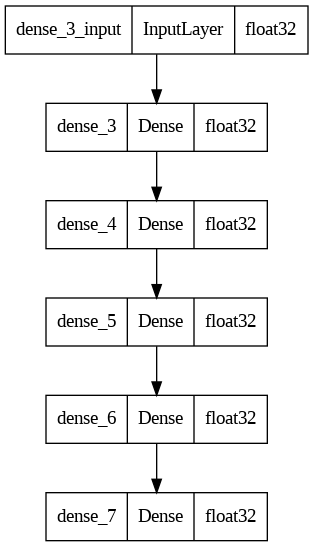

In [78]:
plot_model(model,show_dtype=True,to_file='model.png')